In [ ]:
## Frist install image analysis libraries
!pip install -U scikit-image
!pip install opencv-python 

In [1]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
import numpy as np

In [202]:
def plotHelper(images,labels,plot,filename):
    # display results
    fig, axes = plt.subplots(nrows=1, ncols=len(images), figsize=(10, 4),
                             sharex=False, sharey=False)

    ax = axes.ravel()

    for i in range(0,len(images)):
        ax[i].imshow(images[i], cmap=plt.cm.gray)
        ax[i].set_title(labels[i], fontsize=15)

    fig.tight_layout()

    if(plot):
        plt.show()
    else:
        print("write to file")
        plt.savefig(localdir + filename + ".jpg")

uint8 0 255 (4032, 3024, 3)


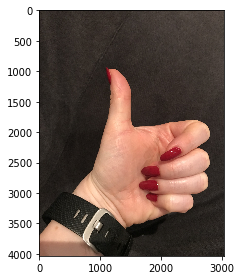

In [336]:
import os
#filename = os.path.join('../images/venue','IMG_7189.jpg') #venue denis ok
#filename = os.path.join('../images/','IMG_7190.jpg') #venue denis great
#filename = os.path.join('../images/venue','IMG_7184.jpg') # venue working.
#filename = os.path.join('../images/venue','IMG_7202.jpg') #fabian venue
#filename = os.path.join('../images/','IMG_20190502_120207129.jpg') #aidan venue

#filename = os.path.join('../images/','IMG_7174_small.jpg')
#filename = os.path.join('../images/','IMG_7174_tiny.jpg')
filename = os.path.join('../images/','IMG_7174.jpg')
#filename = os.path.join('../images/','IMG_7174_zoomed.jpg')
#filename = os.path.join('../images/','IMG_7173.jpg') #cushin 

#filename=os.path.join('../images/','IMG_20190502_094952858.jpg')
#filename = os.path.join('../images/holdout/','L8A1_clip_image006.gif')
#filename = os.path.join('../images/holdout/','thubm1.jpeg') # needs smooth
#filename = os.path.join('../images/holdout/','thumb2.png')
#filename = os.path.join('../images/holdout/','images.jpeg')
#filename = os.path.join('../images/','IMG_20190502_151753361.jpg')
#filename = os.path.join('../images/venue/','IMG_20190502_153459339.jpg')
#filename = os.path.join('../images/venue/','IMG_20190502_153407027.jpg')
#filename = os.path.join('../images/holdout/','images (2).jpeg')
#filename = os.path.join('../images/holdout/','mJYJj7YQKEl8CQ8T1jD3yxEhRT06IRfC_lg')
from skimage import io
hand = io.imread(filename)

print(hand.dtype, hand.min(), hand.max(), hand.shape)

localdir="/Users/bau04c/Documents/datahome/hitchhikersThumb/hitchhikersthumb/images/docuimage/notebook/"
file_name=filename.split("/")[-1]
# way to show the input image 
io.imshow(hand) 
io.show() 

403 302 3225 3113
uint8 0 255 (4032, 3024, 3)
float64 0.0 1.0 (200, 150, 3)
float64 0.008136211137252367 0.9977380392156864 (200, 150, 3)
write to file


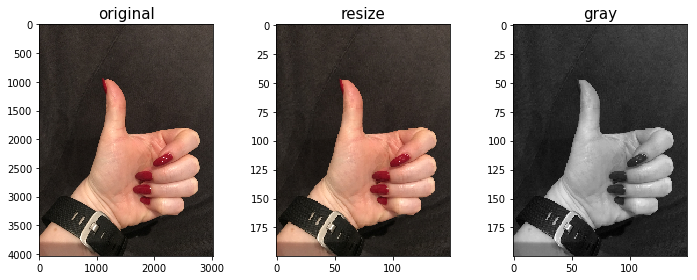

In [337]:
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.color import rgb2gray

# Crop

#bboxHeight=0.8255420327186584
#bboxLeft=0.024784592911601067
#bboxTop=0.15681006014347076
#bboxWidth=0.9297406077384949

bboxHeight=0.7
bboxLeft=0.1
bboxTop=0.1
bboxWidth=0.9297406077384949

imageHeight=hand.shape[0]
imageWidth=hand.shape[1]
x1=int(imageHeight*bboxTop)
y1=int(imageWidth*bboxLeft)
x2=int(x1+imageHeight*bboxHeight)
y2=int(y1+imageWidth*bboxWidth)

print(x1,y1, x2,y2)
cropped = hand[x1:x2,y1:y2]
cropped=hand


print(cropped.dtype, cropped.min(), cropped.max(), cropped.shape)
#io.imshow(cropped) 
#io.show()

mywidth=200
cropped_small=cropped
if cropped.shape[0]!=mywidth:
    wpercent = (mywidth/float(cropped.shape[0]))
    hsize = int((float(cropped.shape[1])*float(wpercent)))
    cropped_small = resize(cropped, (mywidth,hsize), anti_aliasing=False)
    
# if cropped.shape[0]>1000:
#     print("downsample")
#     downsample=20
#     cropped_small = rescale(cropped, 1/ downsample, anti_aliasing=True)
# else:
#     downsample=1
#     cropped_small = rescale(cropped, 1/ downsample, anti_aliasing=True)

#cropped_small=cropped

print(cropped_small.dtype, cropped_small.min(), cropped_small.max(), cropped_small.shape)
#io.imshow(cropped_small) 
#io.show() 

# make it a 2D array out of ints
#cropped_small_bw = (cropped_small*255).astype(np.uint8)
#cropped_small_bw = cropped_small_bw[:,:,0]

cropped_small_bw = rgb2gray(cropped_small)
print(cropped_small_bw.dtype, cropped_small_bw.min(), cropped_small_bw.max(), cropped_small.shape)
#io.imshow(cropped_small_bw) 
#io.show() 

#plotHelper([cropped,cropped_small,cropped_small_bw],["original","resize","gray"],True)
plotHelper([cropped,cropped_small,cropped_small_bw],["original","resize","gray"],False,"readin")


140.0 75.0 15.0 (200, 150)
float64 -1.0 1.0 (200, 150)
uint8 0 1 (200, 150)
write to file
write to file


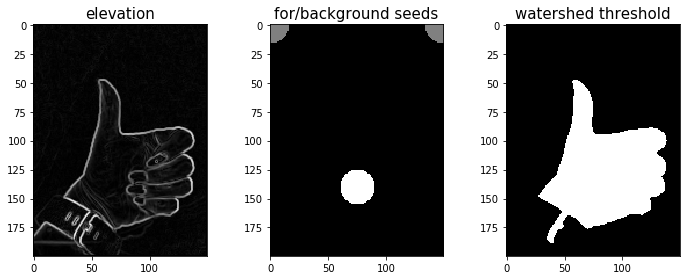

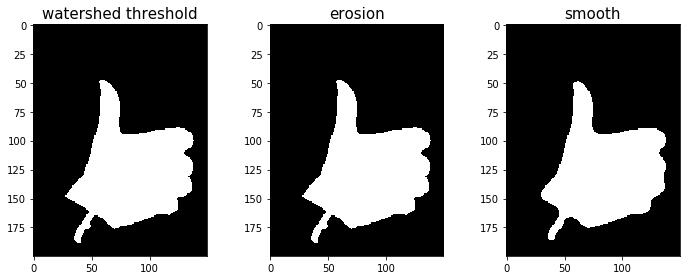

In [338]:
from skimage.filters import sobel
from skimage.morphology import reconstruction
from skimage.filters.rank import median
from skimage.morphology import erosion, watershed
from scipy.ndimage import gaussian_filter
from skimage.morphology import disk
from skimage.draw import circle


elevation_map = sobel(cropped_small_bw)
# fig, ax = plt.subplots(figsize=(4, 3))
# ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
# ax.set_title('elevation map')
#ax.axis('off')

markers = np.zeros_like(cropped_small_bw)
rr, cc = circle(0, 0, circleratio, cropped_small_bw.shape)
markers[rr, cc] = 1 # background
#markers[cropped_small_bw.shape[0]-1, 0] = 1 # background
#markers[0, cropped_small_bw.shape[1]-1] = 1 # background
rr, cc = circle(0, cropped_small_bw.shape[1]-1, circleratio,cropped_small_bw.shape)
markers[rr, cc] = 1 # background
#markers[cropped_small_bw.shape[0]-1, cropped_small_bw.shape[1]-1] = 1 # background
circleratio=min(cropped_small_bw.shape)*0.1
seedx=cropped_small_bw.shape[0]*0.7
seedy=cropped_small_bw.shape[1]*0.5
print(seedx,seedy,circleratio,cropped_small_bw.shape)
#rr, cc = circle(150, 60, int(min(cropped_small_bw.shape)*0.05))
rr, cc = circle(seedx, seedy, circleratio)
markers[rr, cc] = 2

# fig, ax = plt.subplots(figsize=(4, 3))
# ax.imshow(markers, cmap=plt.cm.gray, interpolation='nearest')
# ax.set_title('segmentation')
# ax.axis('off')



segmentation = watershed(gaussian_filter(elevation_map,1), markers)
# fig, ax = plt.subplots(figsize=(4, 3))
# ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
# ax.set_title('segmentation')
# ax.axis('off')

seed = np.copy(segmentation)
seed[1:-1, 1:-1] = segmentation.max()
mask = segmentation
filled = reconstruction(seed, mask, method='erosion')
filled[filled == 1] = -1
filled[filled == 2] = 1
# fig, ax = plt.subplots(figsize=(4, 3))
# ax.imshow(filled, cmap=plt.cm.gray, interpolation='nearest')
# ax.set_title('erosion')
# ax.axis('off')

print(filled.dtype, filled.min(), filled.max(), filled.shape)

smooth=median(filled, disk(5))
smooth[smooth == 255] = 1
# fig, ax = plt.subplots(figsize=(4, 3))
# ax.imshow(smooth, cmap=plt.cm.gray, interpolation='nearest')
# ax.set_title('smooth')
# ax.axis('off')
print(smooth.dtype, smooth.min(), smooth.max(), smooth.shape)

plotHelper([elevation_map,markers,segmentation],["elevation","for/background seeds","watershed threshold"],False,"thresholding")
plotHelper([segmentation,filled,smooth],["watershed threshold","erosion","smooth"],False,"cleanup")



write to file


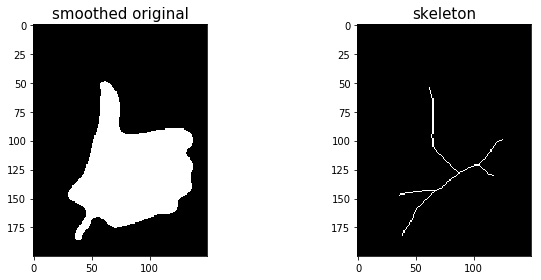

In [339]:
"""
===========
Skeletonize
===========

Skeletonization reduces binary objects to 1 pixel wide representations. This
can be useful for feature extraction, and/or representing an object's topology.

``skeletonize`` works by making successive passes of the image. On each pass,
border pixels are identified and removed on the condition that they do not
break the connectivity of the corresponding object.
"""

# perform skeletonization
skeleton = skeletonize(smooth)

plotHelper([smooth,skeleton],["smoothed original","skeleton"],False,"skeleton")


# # display results
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
#                          sharex=True, sharey=True)

# ax = axes.ravel()

# ax[0].imshow(smooth, cmap=plt.cm.gray)
# ax[0].set_title('original', fontsize=20)

# ax[1].imshow(skeleton, cmap=plt.cm.gray)
# ax[1].set_title('skeleton', fontsize=20)

# fig.tight_layout()
# plt.show()

(200, 150)
height  200 : 10.0 <> 80.0 length  150 : 7.5 <> 60.0
starting  62 54


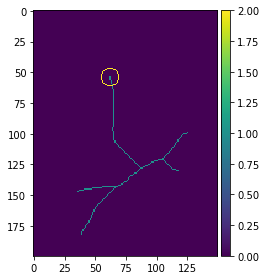

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in long_scalars


1 ps 80.19999999999997, 80.19999999999996>88.21999999999997 at (62,56)
2 ps 80.19999999999996, 80.19999999999999>88.21999999999996 at (63,57)
3 ps 80.19999999999999, 60.39999999999999>88.21999999999998 at (63,58)
4 ps 60.39999999999999, 60.39999999999999>66.44 at (63,59)
5 ps 60.39999999999999, 80.19999999999999>66.44 at (64,60)
6 ps 80.19999999999999, 80.19999999999999>88.21999999999998 at (64,61)
7 ps 80.19999999999999, 60.39999999999999>88.21999999999998 at (64,62)
8 ps 60.39999999999999, 80.19999999999999>66.44 at (64,63)


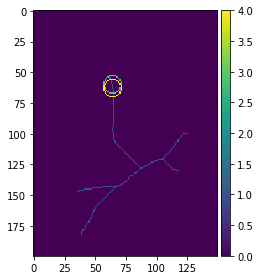

(62,55), (64,60), angle:1.1902899496825317, slope:2.5


In [340]:
from scipy.signal import savgol_filter
from skimage.draw import circle_perimeter
from skimage import img_as_float

ary,arx=np.where(skeleton == True)

#sort by y value
sortorder = ary.argsort()
arx = arx[sortorder]
ary = ary[sortorder]

ih=skeleton.shape[0]
il=skeleton.shape[1]
print(skeleton.shape)
print("height ",ih,":",ih*0.05,"<>",ih*0.4,"length ",il,":",il*0.05,"<>",il*0.4)
# find the smallest x value in the top left bit of the image
s=0
while ((arx[s]>ih*0.4 or arx[s]<ih*0.05) or (ary[s]>il*0.7 or ary[s]<il*0.05)):
#while ((arx[s]>il*0.4 or arx[s]<il*0.05) or (ary[s]>ih*0.4 or ary[s]<ih*0.05)):
    s+=1
    
px=arx[s]
py=ary[s]
print("starting ",px,py)

img = img_as_float(skeleton)
rr, cc = circle_perimeter(py, px, int(min(img.shape)*0.05),'bresenham',img.shape)
img[rr, cc] = 2
plt.gray()
io.imshow(img)
io.show()

aslope,arxc,aryc=[],[],[]
s=s+1
while s < len(arx):
    x=arx[s]
    y=ary[s]
    if x-px>ih*0.1 or y-py>il*0.1:
        s=s+1
        #print("skip",x,y,px,py)
        continue
    dx=x-px
    dy=y-py
    dx=max(x,px)-min(x,px)
    dy=max(y,py)-min(y,py)
    sl = dy/dx
    if sl == float("inf"):
        sl=100
#    print(x,y,px,py,dx,dy,sl)
    #sl = 0 if (np.isnan(dy/dx) or dy/dx == float("inf")) else dy/dx
    aslope.append(sl)
    arxc.append(x)
    aryc.append(y)
    #print(x,y,x-px,y-py,dx,dy,sl)
    px=x
    py=y
    s=s+1
    
slope_smooth = savgol_filter(aslope, 5, 1)
#slope_smooth=aslope

#for s in range(0,len(slope_smooth)):
#    print("({} {}) {} {}".format(arxc[s],aryc[s],aslope[s],slope_smooth[s]))


def traverse(slope_smooth,arxc,aryc,s):
    ps=slope_smooth[s]
    s+=1
    while s < len(slope_smooth):
        print("{} ps {}, {}>{} at ({},{})".format(s, ps,slope_smooth[s],((ps)+abs(ps)*0.10),arxc[s],aryc[s]))
        if (slope_smooth[s]>ps+abs(ps)*0.10):
            break;
        ps=slope_smooth[s]
        s+=1
    return s

s=0        
s1=traverse(slope_smooth,arxc,aryc,s)
s2=traverse(slope_smooth,arxc,aryc,s1)
    
dx=arxc[s1]-arxc[0]
dy=aryc[s1]-aryc[0]
angle=np.arctan(dy/dx)
slope=dy/dx
tx1=arxc[0]
ty1=aryc[0]
tx2=arxc[s1]
ty2=aryc[s1]

img = img_as_float(skeleton)
rr, cc = circle_perimeter(ty2, tx2, int(min(img.shape)*0.05),'bresenham',img.shape)
img[rr, cc] = 3
rr, cc = circle_perimeter(aryc[s2], arxc[s2], int(min(img.shape)*0.05),'bresenham',img.shape)
img[rr, cc] = 4
io.imshow(img)
io.show()
#print(img.dtype, img.min(), img.max(), img.shape)


print("({},{}), ({},{}), angle:{}, slope:{}".format(tx1,ty1,tx2,ty2,angle,slope))




In [341]:
#select only the top bit of the image
stop=int(len(skeleton)/3)
start=int(len(skeleton)/100)
select=skeleton[start:stop ,  :]
m=max(select.sum(0))
baseline = np.where(select.sum(0) == max(select.sum(0)))[0][0]
print("base line {}".format(baseline))

# if this does not yield anything go back to original image
if baseline==0:
    m=max(skeleton.sum(0))
    baseline = np.where(skeleton.sum(0) == max(skeleton.sum(0)))[0][0]
    print("base line {}".format(baseline))


base line 64


1:(62,55) 2:(64,60)
dx:2 dy:5.00001 s:2.500005 b:-100.00030999999998
i:(64,60.00001)
64
float64 0.0 1.0 (200, 150, 3)
line 1: (62,55),(64,60)
line 2: (64,0),(64,199)
(62,60),(64,60.00001)


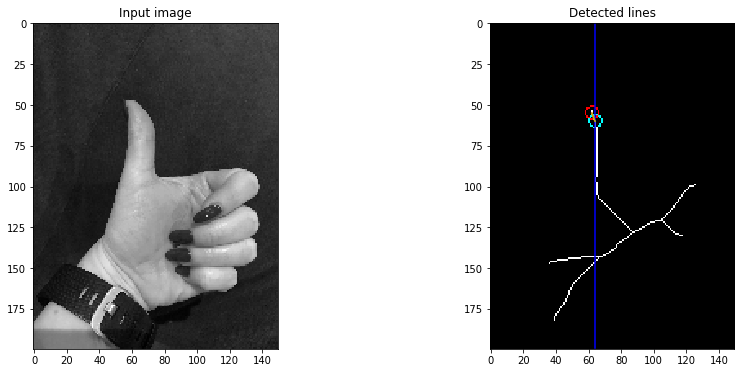

In [342]:
from skimage import color

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#get intersection with thumb baseline
dx=tx2-tx1
dy=ty2-ty1+0.00001
s=dy/dx 
b=ty1-s*tx1 
iy=s*baseline+b

print("1:({},{}) 2:({},{})".format(tx1,ty1,tx2,ty2))
print("dx:{} dy:{} s:{} b:{}".format(dx,dy,s,b))
print("i:({},{})".format(baseline,iy))
print(baseline)

skeleton_copy = color.gray2rgb(img_as_float(skeleton))
print(skeleton_copy.dtype, skeleton_copy.min(), skeleton_copy.max(), skeleton_copy.shape)
rr, cc = circle_perimeter(ty1, tx1, int(min(filled.shape)*0.03),'bresenham',skeleton_copy.shape)
skeleton_copy[rr, cc,0] = 1
rr, cc = circle_perimeter(ty2, tx2, int(min(filled.shape)*0.03),'bresenham',skeleton_copy.shape)
skeleton_copy[rr, cc,1] = 1
rr, cc = circle_perimeter(int(iy), baseline, int(min(filled.shape)*0.03),'bresenham',skeleton_copy.shape)
skeleton_copy[rr, cc,2] = 1

ax = axes.ravel()
ax[0].imshow(cropped_small_bw,cmap=plt.cm.gray)
ax[0].set_title('Input image')
ax[1].imshow(skeleton_copy, cmap=plt.cm.gray)
#ax[1].plot((ty1,ty2),(tx1,tx2), '-r') 
ax[1].plot((tx1,tx2),(ty1,ty2), '-r') 
print("line 1: ({},{}),({},{})".format(tx1,ty1,tx2,ty2))
ax[1].plot((baseline,baseline), (0,skeleton.shape[0]-1), '-b')
print("line 2: ({},{}),({},{})".format(baseline,0,baseline,skeleton.shape[0]-1))
#ax[1].plot((tx2,iy),(ty2,baseline), '-y') 
ax[1].plot((tx1,baseline),(ty1,iy), '-y') 
#ax[1].plot((tx1,tx1),(ty2,baseline), '-y') 
print("({},{}),({},{})".format(tx1,ty2,baseline,iy))
ax[1].set_title('Detected lines')


plt.savefig(localdir + "baseline" + ".jpg")

#cv2.imwrite("green.jpg", green)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


float64 0.005695347796076656 3.0 (200, 150, 3)


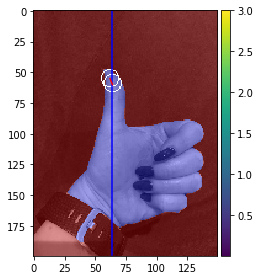

In [343]:
from skimage.draw import circle_perimeter
from skimage.measure import label, regionprops
from skimage.color import label2rgb



#get intersection with thumb baseline
dx=(tx2-tx1)+0.00001
dy=(ty2-ty1)+0.00001
s=dy/dx
b=ty1-s*tx1 
iy=s*baseline+b

label_image = label(filled)
img = label2rgb(label_image, image=cropped_small_bw)
rr, cc = circle_perimeter(ty1, tx1, int(min(filled.shape)*0.05),'bresenham',img.shape)
img[rr, cc] = 2
rr, cc = circle_perimeter(int(iy), baseline, int(min(filled.shape)*0.05),'bresenham',img.shape)
img[rr, cc] = 3

#plt.plot((tx1,tx2),(ty1,ty2), '-y') 
plt.plot((baseline,baseline), (0,skeleton.shape[0]-1), '-b')
plt.plot((tx1,baseline),(ty1,iy), '-r') 

io.imshow(img)
print(img.dtype, img.min(), img.max(), img.shape)

float64 0.0 1.0 (200, 150, 3)
float64 0.0 1.0 (200, 150, 3)


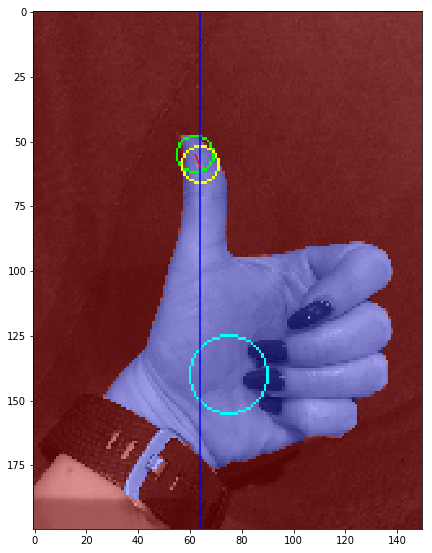

In [365]:
from skimage.draw import circle_perimeter

#get intersection with thumb baseline
dx=(tx2-tx1)+0.00001
dy=(ty2-ty1)+0.00001
s=dy/dx
b=ty1-s*tx1 
iy=s*baseline+b

plt.figure(figsize=(6,8))

label_image = label(filled)
img = label2rgb(label_image, image=cropped_small_bw)
rr, cc = circle_perimeter(ty1, tx1, int(min(filled.shape)*0.05),'bresenham',img.shape)
img[rr, cc, :] = (0,1,0)
rr, cc = circle_perimeter(int(iy), baseline, int(min(filled.shape)*0.05),'bresenham',img.shape)
img[rr, cc, :] = (1,1,0)

circleratio=int(min(smooth.shape)*0.1)
seedx=int(smooth.shape[0]*0.7)
seedy=int(smooth.shape[1]*0.5)
rr, cc = circle_perimeter(seedx, seedy, circleratio,'bresenham',img.shape)
img[rr, cc, :] = (0,1,1)

# rr, cc = circle_perimeter(150, 90, int(min(filled.shape)*0.05),'bresenham',img.shape)
# img[rr, cc, 1] = 1
print(img.dtype, img.min(), img.max(), img.shape)


#plt.plot((tx1,tx2),(ty1,ty2), '-y') 
plt.plot((baseline,baseline), (0,skeleton.shape[0]-1), '-b')
plt.plot((tx1,baseline),(ty1,iy), '-r') 

io.imshow(img)
print(img.dtype, img.min(), img.max(), img.shape)

plt.savefig(localdir + "angles" + ".jpg")

In [314]:
from math import atan2,pi

A1x=tx1
A2x=tx2
A1y=ty1
A2y=ty2
B1x=baseline
B2x=baseline
B1y=0
B2y=skeleton.shape[0]
print("A: ({},{}) ({},{}) B:({} {}) ({} {})".format(A1x,A1y,A2x,A2y,B1x,B1y,B2x,B2y))


dAx = A2x - A1x;
dAy = A2y - A1y;
dBx = B2x - B1x;
dBy = B2y - B1y;
print("{} {} {} {}".format(dAx,dAy,dBx,dBy))

#angle = atan2(dAy * dBx - dAx * dBy, dAy * dBy + dAx * dBx);
angle = atan2(dAx * dBy - dAy * dBx, dAx * dBx + dAy * dBy);
if(angle < 0): 
    angle = angle * -1;
degree_angle = angle * (180 / pi);
print("degree:",degree_angle)
print("angle:",angle)

A: (63,34) (52,34) B:(82 0) (82 200)
-11 0 0 200
degree: 90.0
angle: 1.5707963267948966


# Other approaches that did not work 

In [ ]:
tracking
pixel trace 
neurite tracing 
ryan langstroem 

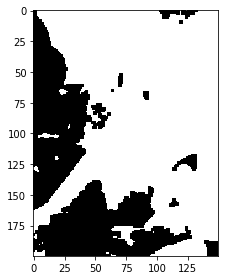

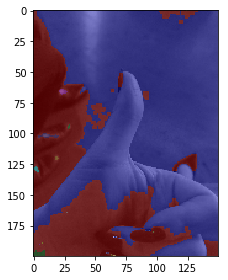

1


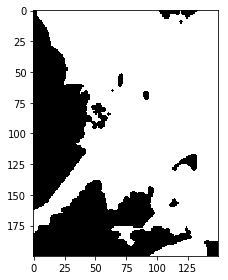

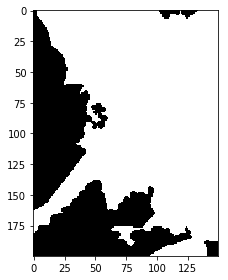

uint8 0 1 (200, 150)


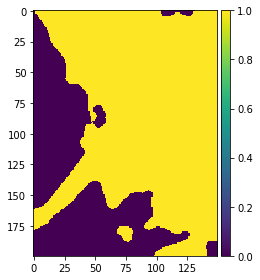

In [29]:

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.morphology import disk


thresh = threshold_otsu(cropped_small_bw)
bw = closing(cropped_small_bw > thresh, square(3))

io.imshow(bw) 
io.show() 


# remove artifacts connected to image border
#cleared = clear_border(bw)
#io.imshow(cleared) 
#io.show()
cleared=bw

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=cropped_small_bw)

io.imshow(image_label_overlay) 
io.show() 

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.imshow(image_label_overlay)
# ax.set_axis_off()
# plt.tight_layout()
# plt.show()


area=[]
for region in regionprops(label_image):
    area.append((region.area,region.label))
m=max(area,key=lambda item:item[0])
print(m[1])
largest = closing(label_image == m[1])
io.imshow(largest) 
io.show()


from skimage.morphology import reconstruction

seed = np.copy(largest)
seed[1:-1, 1:-1] = largest.max()
mask = largest

filled = reconstruction(seed, mask, method='erosion')
io.imshow(filled) 
io.show()

#####NOT SURE WHICH ONE IS BETTER
from skimage.filters.rank import median
smooth=median(filled, disk(5))
smooth[smooth == 255] = 1
print(smooth.dtype, smooth.min(), smooth.max(), smooth.shape)
io.imshow(smooth) 
io.show()

#     # take regions with large enough areas
#     if region.area >= 100:
#         # draw rectangle around segmented coins
#         minr, minc, maxr, maxc = region.bbox
#         rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
#                                   fill=False, edgecolor='red', linewidth=2)
#         ax.add_patch(rect)



In [ ]:
from skimage.filters import sobel

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(cropped_small_bw)
coins=cropped_small_bw
elevation_map = sobel(cropped_small_bw)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('elevation map')
ax.axis('off')

#markers = np.zeros_like(coins)
#markers[coins < 0.3] = 1
#markers[coins > 0.4] = 2 #foreground

markers = np.zeros_like(coins)
markers[0, 0] = 1 # background
markers[150, 90] = 2 # foreground

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax.set_title('markers')
ax.axis('off')

segmentation = morphology.watershed(gaussian_filter(elevation_map,1), markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('segmentation')
ax.axis('off')

In [ ]:
from skimage.feature import canny

edges = canny(cropped_small_bw)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Canny detector')
ax.axis('off')

from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(fill_coins, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('filling the holes')
ax.axis('off')

from skimage import morphology

coins_cleaned = morphology.remove_small_objects(fill_coins, 21)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(coins_cleaned, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('removing small objects')
ax.axis('off')

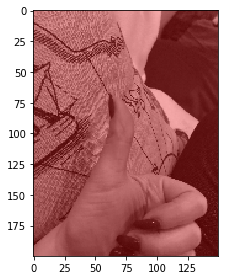

In [96]:
from skimage import data
from skimage.exposure import histogram

coins = cropped_small_bw
hist, hist_centers = histogram(coins)

from skimage.feature import canny
edges = canny(coins/255.)

from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(edges)

label_objects, nb_labels = ndi.label(fill_coins)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0
coins_cleaned = mask_sizes[label_objects]

markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

from skimage.filters import sobel
elevation_map = sobel(coins)
io.imshow(elevation_map)

markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

from skimage.morphology import watershed
segmentation = watershed(elevation_map, markers)

segmentation = ndi.binary_fill_holes(segmentation - 1)

labeled_coins, _ = ndi.label(segmentation)

img=label2rgb(labeled_coins, image=cropped_small_bw)
io.imshow(img)

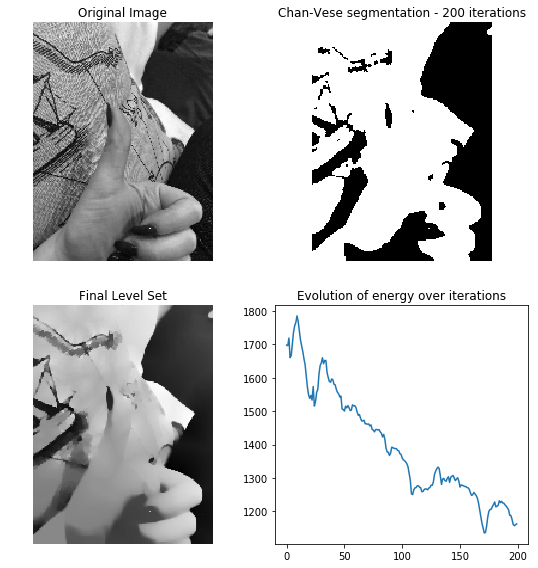

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese

image = cropped_small_bw
# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(image, mu=0.1, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set="checkerboard", extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

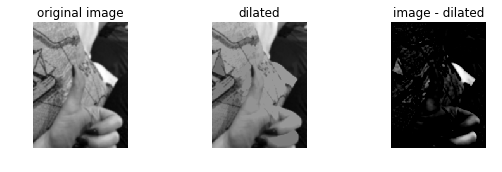

In [98]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

# Convert to float: Important for subtraction later which won't work with uint8
image = cropped_small_bw
image = gaussian_filter(image, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(image - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()

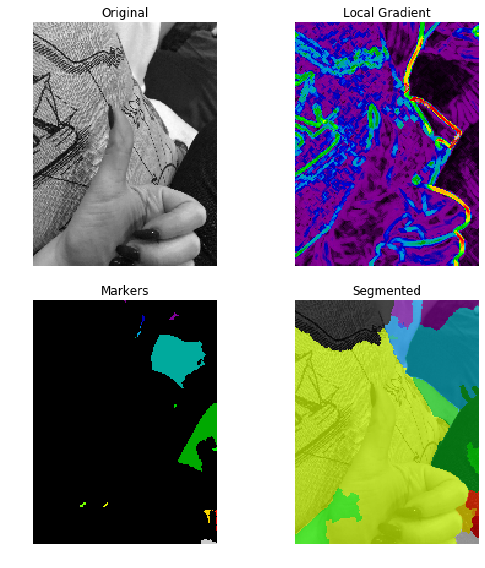

In [99]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.morphology import watershed, disk
from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte


image = cropped_small_bw

# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest', alpha=.7)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

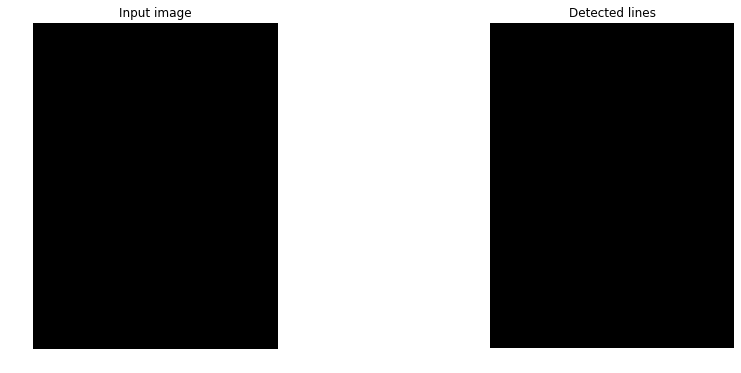

In [100]:
import numpy as np

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


image=skeleton

# Classic straight-line Hough transform
#h, theta, d = hough_line(image)
h, theta, d = hough_line(image, theta=np.linspace(-np.pi/2,np.pi/2,10))


fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[1].plot((0, image.shape[1]), (y0, y1), '-r')
    print("({} {}) ({} {}) {} {}".format(0,image.shape[1],y0,y1, angle, dist))
    if (angle==-0.2480204726518258 or angle==0.08267349088394194):
        ax[1].plot((0, image.shape[1]), (y0, y1), '-b')
        print("-- ({} {}) ({} {}) {} {}".format(0,image.shape[1],y0,y1, angle, dist))
ax[1].set_xlim((0, image.shape[1]))
ax[1].set_ylim((image.shape[0], 0))
ax[1].set_axis_off()
ax[1].set_title('Detected lines')

ax[1].imshow(smooth, cmap=cm.gray)


In [ ]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

selem = disk(20)

dilated = dilation(filled, selem)
plot_comparison(filled, dilated, 'dilation')




In [ ]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.morphology import watershed, disk
from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte


image = cropped_small_bw

# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest', alpha=.7)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu

thresh = threshold_otsu(cropped_small_bw)
thresh = ((cropped_small_bw > thresh)*255).astype(np.uint8)
print(thresh.dtype, thresh.min(), thresh.max(), thresh.shape)

#thresh = (cropped_small > thresh_img).astype(np.uint8)
#plt.imshow(cropped < thresh, cmap='gray', interpolation='nearest')
#plt.show()

io.imshow(thresh) 
io.show() 

In [ ]:
from skimage.morphology import medial_axis, skeletonize, skeletonize_3d

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(smooth, return_distance=True)

# Compare with other skeletonization algorithms
skeleton = skeletonize(smooth)
skeleton3d = skeletonize_3d(smooth)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(smooth, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(dist_on_skel, cmap='magma', interpolation='nearest')
ax[1].contour(smooth, [0.5], colors='w')
ax[1].set_title('medial_axis')
ax[1].axis('off')

ax[2].imshow(skeleton, cmap=plt.cm.gray, interpolation='nearest')
ax[2].set_title('skeletonize')
ax[2].axis('off')

ax[3].imshow(skeleton3d, cmap=plt.cm.gray, interpolation='nearest')
ax[3].set_title('skeletonize_3d')
ax[3].axis('off')

fig.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure

# Find contours at a constant value of 0.8
contours = measure.find_contours(thresh, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(thresh, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


In [ ]:
# Try thresholding

import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu

from skimage.filters import try_all_threshold

img = cropped_small_bw



#img.dtype, image.min(), image.max(), image.shape

#img = (img*255).astype(np.uint8)
#img = img[:,:,0]

print(img.dtype, img.min(), img.max(), img.shape)
#print(img[0:1])

# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#img = cv2.imread('hitchhikersthumb/images/IMG_7174.jpg')
img = cropped_small
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
io.imshow(thresh) 
io.show() 

In [ ]:
# noise removal
kernel = np.ones((200,200),np.uint8)
smoothed = invert(cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)).astype(np.uint8)
smoothed[smoothed == 255] = 1

io.imshow(smoothed) 
io.show()


In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu


thresh_img = threshold_otsu(cropped_small)
thresh = (cropped_small > thresh_img).astype(np.uint8)
#plt.imshow(cropped < thresh, cmap='gray', interpolation='nearest')
#plt.show()

io.imshow(thresh) 
io.show() 


In [ ]:
from skimage import morphology
cleaned = morphology.remove_small_objects(thresh, min_size=100000, connectivity=200)

io.imshow(cleaned) 
io.show()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.morphology import skeletonize
from skimage.viewer import ImageViewer

#img = cv2.imread('/Users/bau04c/Downloads/IMG_7173.jpg',0)

img=thresh

kernel = np.ones((1,1),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
blur = cv2.GaussianBlur(opening,(1,1),0)
ret3,th4 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
th4[th4 == 255] = 1
skel = skeletonize(th4)
viewer = ImageViewer(skel)
viewer.show()


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.morphology import skeletonize
from skimage.viewer import ImageViewer
img = cv2.imread('/Users/bau04c/Downloads/IMG_7174.jpg',0)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
io.imshow(opening) 
io.show()

blur = cv2.GaussianBlur(opening,(255,255),0)

io.imshow(blur) 
io.show()

#ret3,th4 = cv2.threshold(blur,400,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


io.imshow(th4) 
io.show()

th4[th4 == 255] = 1
#skel = skeletonize(th4)
#viewer = ImageViewer(skel)
#viewer.show()

In [ ]:
import numpy as np

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


# Line finding using the Probabilistic Hough Transform
image = thresh
edges = canny(image, 2, 5, 1)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
# Read in gray (optional)

#gray = hand.sum(-1)  # sums along the last (color) axis
#import numpy as np
#gray = np.sqrt((hand*hand).sum(-1)) # to do a magnitude of the color vector

from PIL import Image
img = Image.open("hitchhikersthumb/images/IMG_7174.jpg")
gray = img.convert('L')   # 'L' stands for 'luminosity'
gray = np.asarray(gray)

io.imshow(gray) 
io.show()  